In [1]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# fix random seed for reproducibility
seed = 155
np.random.seed(seed)

In [4]:
df = pd.read_csv('/content/drive/My Drive/data.csv')

In [55]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Age,Fare,Sex_male,Embarked_S,Family
0,1,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,0,1,2
4,5,0,3,"Allen, Mr. William Henry",35.0,8.0500,1,1,1
5,7,0,1,"McCarthy, Mr. Timothy J",54.0,51.8625,1,1,1
6,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,11.1333,0,1,3
7,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,30.0708,0,0,2
8,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,16.7000,0,1,3
9,12,1,1,"Bonnell, Miss. Elizabeth",58.0,26.5500,0,1,1


In [56]:
X = df.drop(['Survived','PassengerId','Name'],axis=1) # survived is our output and passengerid and name can't be used
                                                      # to train the data since passengerid is just to keep track of 
                                                      # how many passengers we have and Name can't be studied since
                                                      # it is a string
y = df['Survived']  #output

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
#random state is just used to ensure that we can generate the same output everytime we split. If not used
#everytime our train and test split will be different

In [82]:
np.random.seed(seed)
ann = Sequential() # create model
ann.add(Dense(10, input_dim=6, activation='relu')) # hidden layer
ann.add(Dense(10, input_dim=6, activation='relu')) # hidden layer
ann.add(Dense(1, activation='sigmoid')) # output layer
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [83]:
ann_fitted = ann.fit(X_train, y_train, epochs=300, verbose=0, initial_epoch=0)

In [84]:
score = ann.evaluate(X_test, y_test, verbose=0)
# print model loss and accuracy
print("\nLoss: ", score[0])
print("Accuracy: ", score[1])
#as we can see, we yielded higher accuracy than the logistic regression in the
# neural network. Neural networks are usually the most powerful algorithms
# to fit and predict data. However in our case, using a logistic regression
# can do the job perfectly and yield results close to ann.


Loss:  0.4248782694339752
Accuracy:  0.8235294222831726


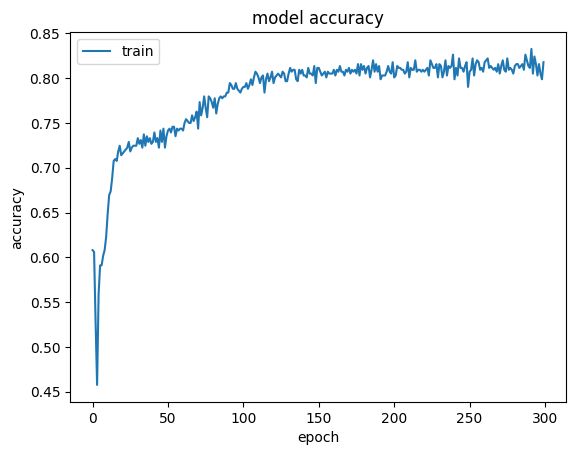

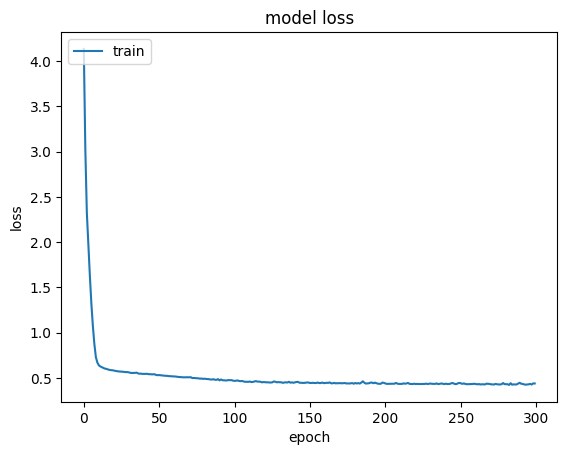

In [85]:
plt.plot(ann_fitted.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot model loss over time 
plt.plot(ann_fitted.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
